<a href="https://colab.research.google.com/github/linneverh/Data-project-/blob/main/pogingen_Linne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data
df_green = pd.read_csv('/content/new_tree_europe_cities(in).csv')

In [ ]:
# Dataset Overview
df_green.head() # preview a sample

,City name,City code,FUA name,Area in km2,Tree cover [%],Tree cover [km2]
0,Oulu / Uleåborg,FI004C3,Oulu,3156,77.54,2447
1,Kuopio,FI008C3,Kuopio,3737,64.19,2399
2,Umeå,SE005C1,Umeå,2391,81.71,1953
3,Uppsala,SE006C1,Uppsala,2248,66.77,1501
4,Jönköping,SE004C1,Jönköping,1937,57.90,1122


In [ ]:
df_green.shape  # number of observations and features (988,6)


(988, 6)

In [ ]:
df_green.dtypes

,0
City name,object
City code,object
FUA name,object
Area in km2,int64
Tree cover [%],float64
Tree cover [km2],int64


In [ ]:
df_green.isna().sum()

,0
City name,0
City code,0
FUA name,0
Area in km2,0
Tree cover [%],0
Tree cover [km2],0


In [ ]:
df_green.describe()

,Area in km2,Tree cover [%],Tree cover [km2]
count,988.000000,988.000000,988.000000
mean,161.074899,28.528664,55.752024
std,288.557606,15.883360,163.782210
min,2.000000,1.420000,0.000000
25%,43.000000,16.225000,9.000000
50%,86.000000,24.820000,23.000000
75%,165.000000,38.785000,49.000000
max,3737.000000,83.870000,2447.000000


In [ ]:
!pip install ydata-profiling
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title="Green coverage report")

<Axes: >

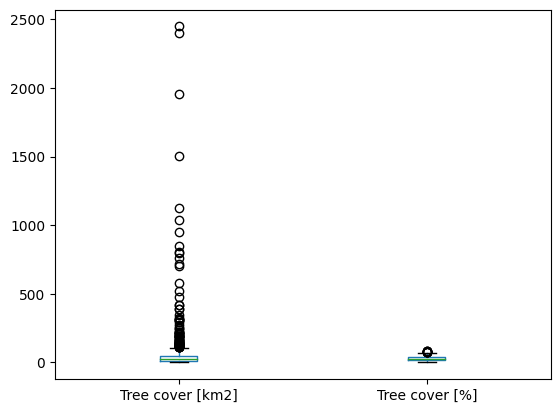

In [ ]:
#boxplot
df_green.boxplot(column =['Tree cover [km2]', 'Tree cover [%]'], grid = False)

In [ ]:
profile = ProfileReport(df_green,title="Green coverage report")
profile.to_file("green_coverage_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

MAP

In [ ]:
df_merged= pd.read_csv("/content/result_of_table_match_green(Sheet1) (1).csv")
profile2 = ProfileReport(df_merged,title="Merged")
profile2.to_file("Merged.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_merged.head()

,Unnamed: 0,NUTS_ID,CNTR_CODE,REGION,HOMICIDE_COUNT,country,fua_name,fua_code_new,green
0,0,AL011,AL,Dibër,5,AL,Tirana,AL001,48.549466
1,1,AL012,AL,Durrës,6,AL,Tirana,AL001,48.549466
2,2,AL013,AL,Kukës,3,AL,ShkodÃ«r,AL004,46.215726
3,3,AL014,AL,Lezhë,3,AL,ShkodÃ«r,AL004,46.215726
4,4,AL015,AL,Shkodër,9,AL,ShkodÃ«r,AL004,46.215726


In [ ]:
import plotly.express as px
df_green_location = pd.read_excel("/content/FUA location map.xlsx")
df_green_location.head()

,FUA name,FUA-code,FUA code,Tree cover [% of FUA],X,Y
0,Aachen,*,DE507,46.933964,6.216840,50.728001
1,Aalborg,DK004,DK004,20.680417,9.923460,57.107101
2,Aberdeen,UK016,UK016,19.158545,-2.615780,57.239799
3,Acireale,IT056,IT056,58.932772,15.155400,37.649399
4,Adana-Mersin,TR002,TR002,39.638941,35.054798,37.007301


In [ ]:
# prompt: add df_green_locations "X" & "Y" column to df_green based on FUA name

import pandas as pd

# Assuming 'FUA name' is the common column between df_green and df_green_location

df_merged_location = pd.merge(df_green, df_green_location[['FUA name', 'X', 'Y']], on='FUA name', how='left')

# Print the merged DataFrame to verify the changes
print(df_merged_location.head())


         City name City code   FUA name  Area in km2  Tree cover [%]  \
0  Oulu / Uleåborg   FI004C3       Oulu         3156           77.54   
1           Kuopio   FI008C3     Kuopio         3737           64.19   
2             Umeå   SE005C1       Umeå         2391           81.71   
3          Uppsala   SE006C1    Uppsala         2248           66.77   
4        Jönköping   SE004C1  Jönköping         1937           57.90   

   Tree cover [km2]          X          Y  
0              2447  25.794001  65.116096  
1              2399  27.820999  62.865601  
2              1953  19.782600  64.059303  
3              1501  17.691601  60.127102  
4              1122  14.151400  57.761799  


In [ ]:
#dataset is `df_green` and contains latitude and longitude
map_green = px.scatter_geo(
    df_merged_location,                                # dataframe as argument
    lat="Y",                          # column name for latitude
    lon="X",                         # column name for longitude
    size="Tree cover [km2]",                 # size of points based on tree cover area
    color="Tree cover [km2]",                # color points based on tree cover area
    hover_name="FUA name",                   # name of the city on hover
    color_continuous_scale="Greens",   # choice of color scale
    projection="natural earth"               # map projection type
)

# Add a title and update layout
map_green.update_layout(
    title={
        'text': "Tree cover [km2] per City",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the map
map_green.show()


BIVARIATE ANALYSIS

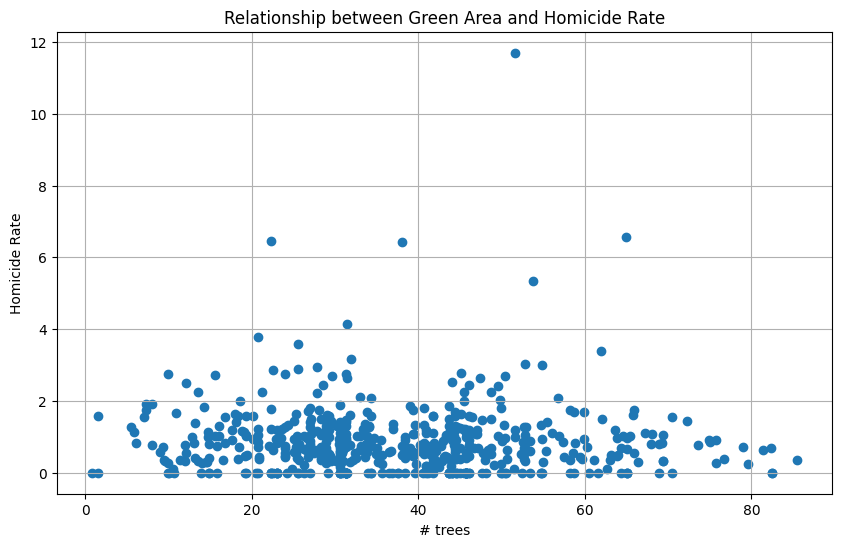

In [ ]:
# prompt: plot green t.o.v.H_rate in df_merged

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged has columns 'green_pc' and 'H_rate'

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['green'], df_merged['H_RATE'])
plt.xlabel('# trees')
plt.ylabel('Homicide Rate')
plt.title('Relationship between Green Area and Homicide Rate')
plt.grid(True)
plt.show()


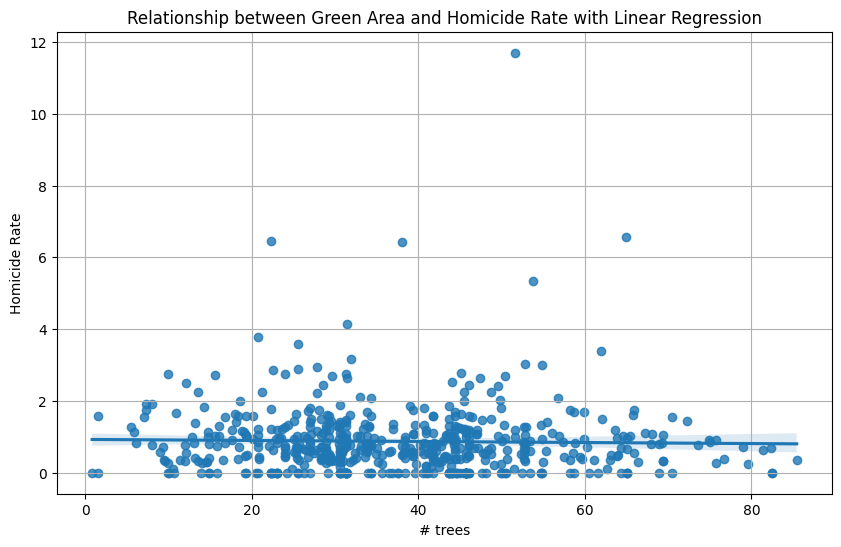

In [ ]:
# prompt: plot #trees in function of homocide rate + add linear regression; show the output of the regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_merged has columns 'green_pc' and 'H_rate'

# Prepare data for regression
X = df_merged['green'].values.reshape(-1, 1)  # Independent variable (green area)
y = df_merged['H_RATE'].values  # Dependent variable (homicide rate)


# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the regression results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Calculate and print the R-squared value
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('# trees')
plt.ylabel('Homicide Rate')
plt.title('Relationship between Green Area and Homicide Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: make the regression of the plot above explicit and perform a anova test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm

# Assuming df_merged has columns 'green_pc' and 'H_rate'

# Prepare data for regression
X = df_merged['green'].values.reshape(-1, 1)  # Independent variable (green area)
y = df_merged['H_RATE'].values  # Dependent variable (homicide rate)

# Create and fit the linear regression model using statsmodels for ANOVA
model = sm.ols('H_RATE ~ green', data=df_merged).fit()

# Print the regression results
print(model.summary())

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(df_merged[['green']]), color='red', label='Regression Line')
plt.xlabel('# trees')
plt.ylabel('Homicide Rate')
plt.title('Relationship between Green Area and Homicide Rate')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 H_RATE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3133
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.576
Time:                        21:03:20   Log-Likelihood:                -754.91
No. Observations:                 548   AIC:                             1514.
Df Residuals:                     546   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9276      0.105      8.843      0.0

AttributeError: module 'statsmodels.formula.api' has no attribute 'stats'

In [ ]:
# prompt: make a visual map (all cities) of the df_merged where you see the amount of green space as a dot legenda: green (much green) to red (little green); latitude and longitude are not given

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_merged has a 'green' column representing the amount of green space
# and you have a way to obtain latitude and longitude for each city (e.g., through a separate dataset or API)

# Example: Assuming you have latitude and longitude columns in df_merged
# If you don't have them, you'll need to fetch them externally.
# df_merged['latitude'] = ...
# df_merged['longitude'] = ...


# Create a scatter plot with color representing the amount of green space
plt.figure(figsize=(10, 8))

# Assuming you have latitude and longitude columns in df_merged
plt.scatter(
    df_merged['lng'],  # Replace with your longitude column name
    df_merged['lat'],  # Replace with your latitude column name
    c=df_merged['green'],  # Replace 'green' with your green space column name
    cmap='RdYlGn_r',  # Use a colormap from red (little green) to green (much green)
    s=50,  # Adjust the size of the dots
    alpha=0.7  # Adjust the transparency of the dots
)


plt.colorbar(label='Amount of Green Space')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Green Space in Cities')
plt.grid(True)
plt.show()



KeyError: 'lng'

<Figure size 1000x800 with 0 Axes>